In [1]:
# Import Torch
import torch

In [2]:
# For Dataset Loading Torchvision
import torchvision

In [3]:
# To Transform Images into Tensors of normalized Range
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [6]:
# Loading the Training Set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

Using downloaded and verified file: ./data\cifar-10-python.tar.gz


In [7]:
# Loading the Test Set
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


In [8]:
# Target Classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Function to show Image
def show(img):
    img = img / 2 + 0.5  # to unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

In [30]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

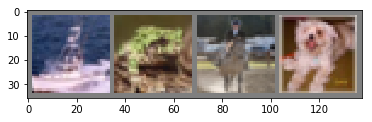

In [31]:
# show images
show(torchvision.utils.make_grid(images))

In [76]:
# For the Neural Network
import torch.nn as nn
import torch.nn.functional as F

In [86]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


CNN = NN()

In [87]:
# To optimize the loss function
import torch.optim as optim

In [88]:
# Loss Function
criterion = nn.CrossEntropyLoss()

In [89]:
# Optimizier
optimizer = optim.SGD(CNN.parameters(), lr=0.001, momentum=0.9)

In [90]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = CNN(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.193
[1,  4000] loss: 1.818
[1,  6000] loss: 1.639
[1,  8000] loss: 1.520
[1, 10000] loss: 1.449
[1, 12000] loss: 1.426
[2,  2000] loss: 1.357
[2,  4000] loss: 1.300
[2,  6000] loss: 1.294
[2,  8000] loss: 1.249
[2, 10000] loss: 1.227
[2, 12000] loss: 1.223
[3,  2000] loss: 1.136
[3,  4000] loss: 1.117
[3,  6000] loss: 1.113
[3,  8000] loss: 1.101
[3, 10000] loss: 1.106
[3, 12000] loss: 1.091
Finished Training


GroundTruth:    cat  ship  ship plane


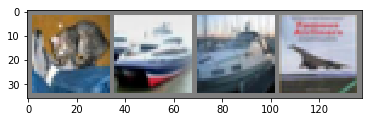

In [91]:
# Let's see what the CNN has learnt
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
show(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [92]:
outputs = CNN(images)

In [93]:
# The Peredictions
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [94]:
# Prediction on the Test Set
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = CNN(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [95]:
# Accuracy
print('Accuracy of the CNN on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the CNN on the 10000 test images: 61 %


In [63]:
# TO Check if CUDA is working properly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [64]:
# Transferring the CNN onto GPU
#CNN.to(device)

NN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [65]:
# Sending Inputs and Targets onto the GPU too
#inputs, labels = inputs.to(device), labels.to(device)

In [106]:
llayers=list(CNN.modules())
print(llayers)

[NN(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
), Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1)), MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False), Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1)), Linear(in_features=400, out_features=120, bias=True), Linear(in_features=120, out_features=84, bias=True), Linear(in_features=84, out_features=10, bias=True)]


In [135]:
# Now to visualize the Image Feature Maps learned by the Model at different layers of the CNN

In [119]:
# Helper function which converts 3D image tensor to grayscale images corresponding to each channel
def to_grayscale(image):
    image = torch.sum(image, dim=0)
    image = torch.div(image, image.shape[0])
    return image

In [122]:
# Function to display the layer outputs
def layer_outputs(image):
    outputs = []
    names = []
    image.unsqueeze_(0) 
    for layer in llayers[1:4]:
        image = layer(image)
        outputs.append(image)
        names.append(str(layer))
        
    output_im = []
    for i in outputs:
        i = i.squeeze(0)
        temp = to_grayscale(i)
        output_im.append(temp.data.cpu().numpy())
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (30, 50)
    for i in range(len(output_im)):
        a = fig.add_subplot(8,4,i+1)
        imgplot = plt.imshow(output_im[i])
        plt.axis('off')
        a.set_title(names[i].partition('(')[0], fontsize=30)

    plt.savefig('layer_outputs.jpg', bbox_inches='tight')

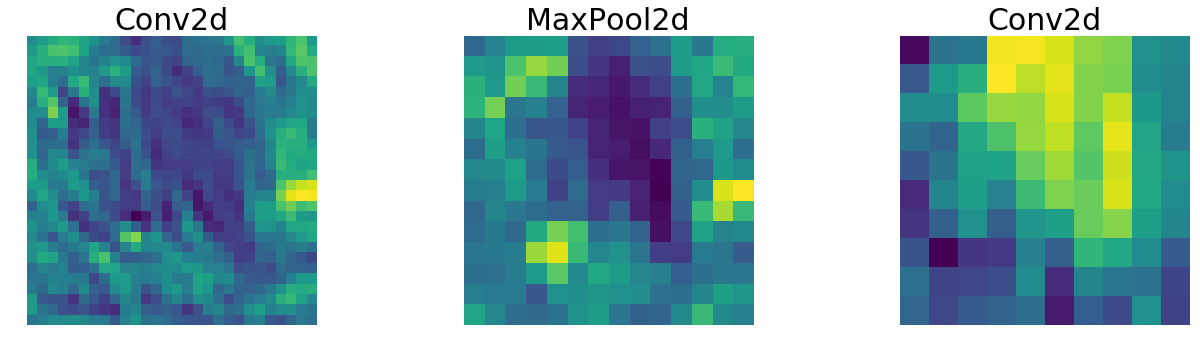

In [129]:
layer_outputs(images[0])

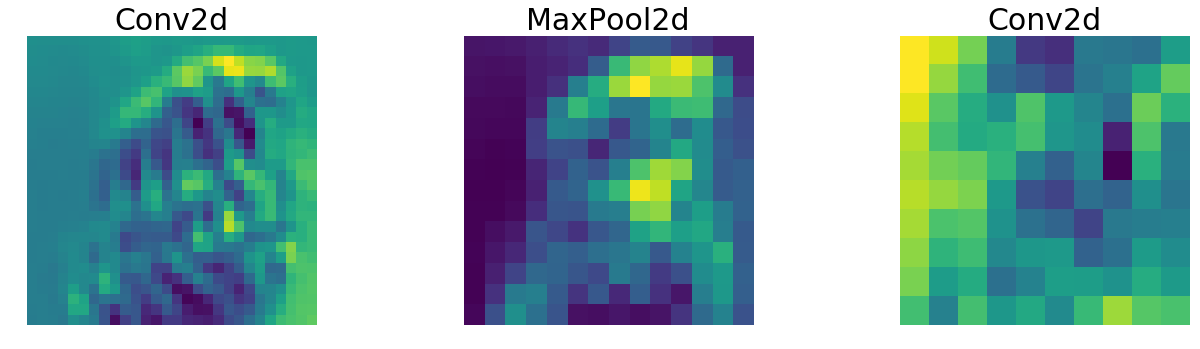

In [131]:
layer_outputs(images[1])

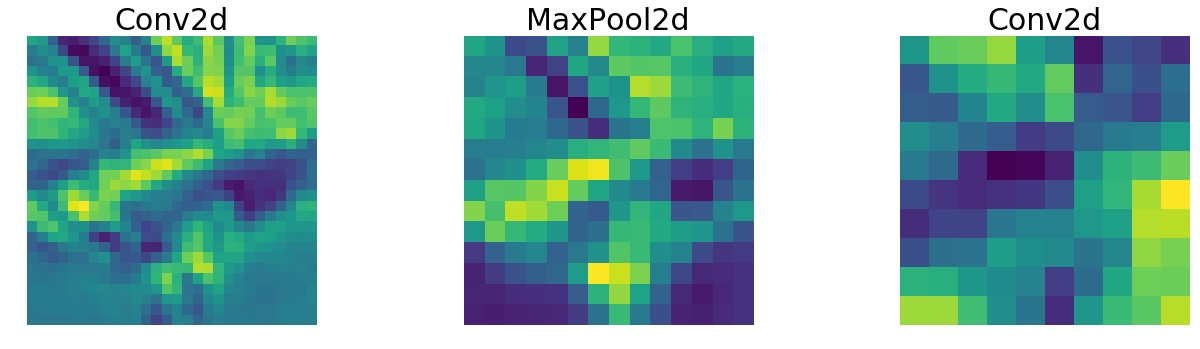

In [132]:
layer_outputs(images[2])

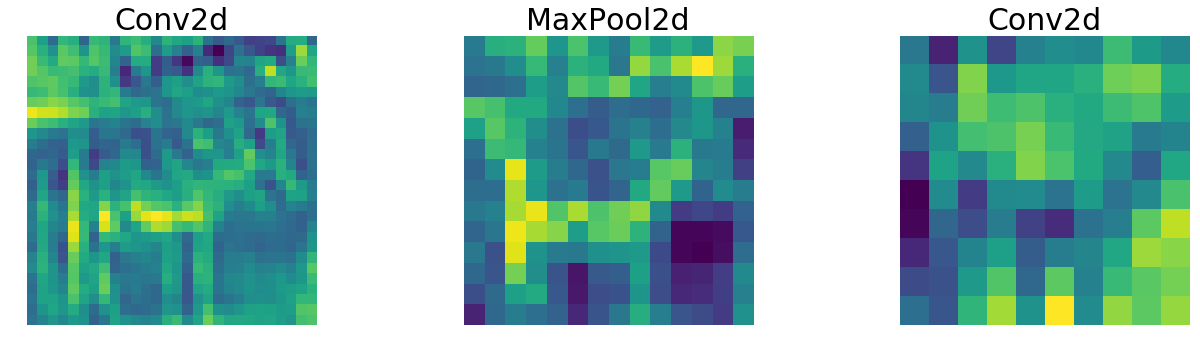

In [136]:
layer_outputs(images[3])